> In this colab turtorial we will learning how to train a simple linear regression model. 

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

2022-10-20 21:41:50.165590: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-20 21:41:50.237712: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-20 21:41:50.256888: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-20 21:41:50.684716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

## Data

Supervised learning uses *inputs* (usually denoted as *x*) and *outputs* (denoted *y*, often called *labels*).  The goal is to learn from paired inputs and outputs so that you can predict the value of an output from an input.

In [2]:
# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

# A vector of random x values
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
  return x * TRUE_W + TRUE_B

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = f(x) + noise

2022-10-20 21:42:16.647012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-20 21:42:16.666985: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-20 21:42:16.667383: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-20 21:42:16.668824: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

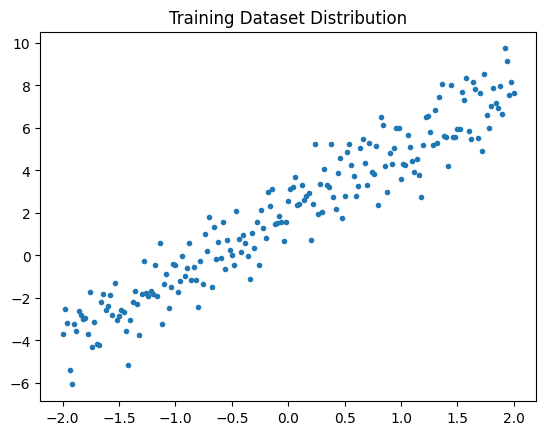

In [5]:
# Plot all the data
plt.plot(x, y, '.')
plt.title('Training Dataset Distribution')
plt.show()

Tensors are usually gathered together in *batches*, or groups of inputs and outputs stacked together.  Batching can confer some training benefits and works well with accelerators and vectorized computation.  Given how small this dataset is, you can treat the entire dataset as a single batch.

### Define a loss function

A loss function measures how well the output of a model for a given input matches the target output. The goal is to minimize this difference during training. Define the standard L2 loss, also known as the "mean squared" error:

In [6]:
# This computes a single loss value for an entire batch
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

**Training linear regression model using tf.Keras.Model**

It's useful to contrast the code above with the equivalent in Keras.



In [10]:
def train(model, x, y, learning_rate):

  with tf.GradientTape() as t:
    # Trainable variables are automatically tracked by GradientTape
    current_loss = loss(y, model(x))


In [13]:
class MyModelKeras(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def call(self, x):
    return self.w * x + self.b

keras_model = MyModelKeras()



Rather than write new training loops each time you create a model, you can use the built-in features of Keras as a shortcut.  This can be useful when you do not want to write or debug Python training loops.

If you do, you will need to use `model.compile()` to set the parameters, and `model.fit()` to train.  It can be less code to use Keras implementations of L2 loss and gradient descent, again as a shortcut.  Keras losses and optimizers can be used outside of these convenience functions, too, and the previous example could have used them.

In [14]:
## Using callback to visualize the training in the tensorboard
tb_callback=tf.keras.callbacks.TensorBoard(log_dir='./logs')

In [15]:
keras_model = MyModelKeras()

# compile sets the training parameters
keras_model.compile(
    # By default, fit() uses tf.function().  You can
    # turn that off for debugging, but it is on now.
    run_eagerly=False,

    # Using a built-in optimizer, configuring as an object
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),

    # Keras comes with built-in MSE error
    # However, you could use the loss function
    # defined above
    loss=tf.keras.losses.mean_squared_error,
)

Keras `fit` expects batched data or a complete dataset as a NumPy array.  NumPy arrays are chopped into batches and default to a batch size of 32.

In this case, to match the behavior of the hand-written loop, you should pass `x` in as a single batch of size 1000.

In [16]:
print(x.shape[0])
keras_model.fit(x, y, epochs=10, batch_size=1000,callbacks=[tb_callback],shuffle=True)

201
Epoch 1/10
1/1 [==============================] - 0s 156ms/step - loss: 10.5330
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 6.5551
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 4.2787
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 2.9657
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 2.2021
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 1.7545
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 1.4898
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 1.3322
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 1.2375
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 1.1803


Visualizing the results with **tensorboard**

In [18]:

# Load the TensorBoard notebook extension.
%load_ext tensorboard